In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def histogram_equalization(img):
    img = np.array(img)
    h, w = img.shape
    hist = np.zeros(256)
    for i in range(h):
        for j in range(w):
            hist[img[i, j]] += 1
    hist /= h * w
    cdf = np.zeros(256)
    cdf[0] = hist[0]
    for i in range(1, 256):
        cdf[i] = cdf[i - 1] + hist[i]
    cdf *= 255
    cdf = cdf.astype(np.uint8)
    for i in range(h):
        for j in range(w):
            img[i, j] = cdf[img[i, j]]
    return Image.fromarray(img)

In [3]:
def calc_histogram(image, label):
    histogram = np.zeros(256)
    for pixel in image.getdata():
        histogram[pixel] += 1

    fig, ax = plt.subplots()
    fig.set_size_inches(12, 6)
    ax.bar(range(256), histogram, color='skyblue', edgecolor='gray', width=1.0)

    ax.set_xlabel('Pixel Value', fontsize=14)
    ax.set_ylabel('Frequency', fontsize=14)
    ax.set_title(label, fontsize=16, fontweight='bold')
    ax.set_xlim(0, 255)
    ax.set_ylim(0, max(histogram) * 1.1)
    ax.grid(True, linestyle='--', alpha=0.6)

    ax.tick_params(axis='both', which='major', labelsize=12)
    plt.tight_layout()
    plt.show()

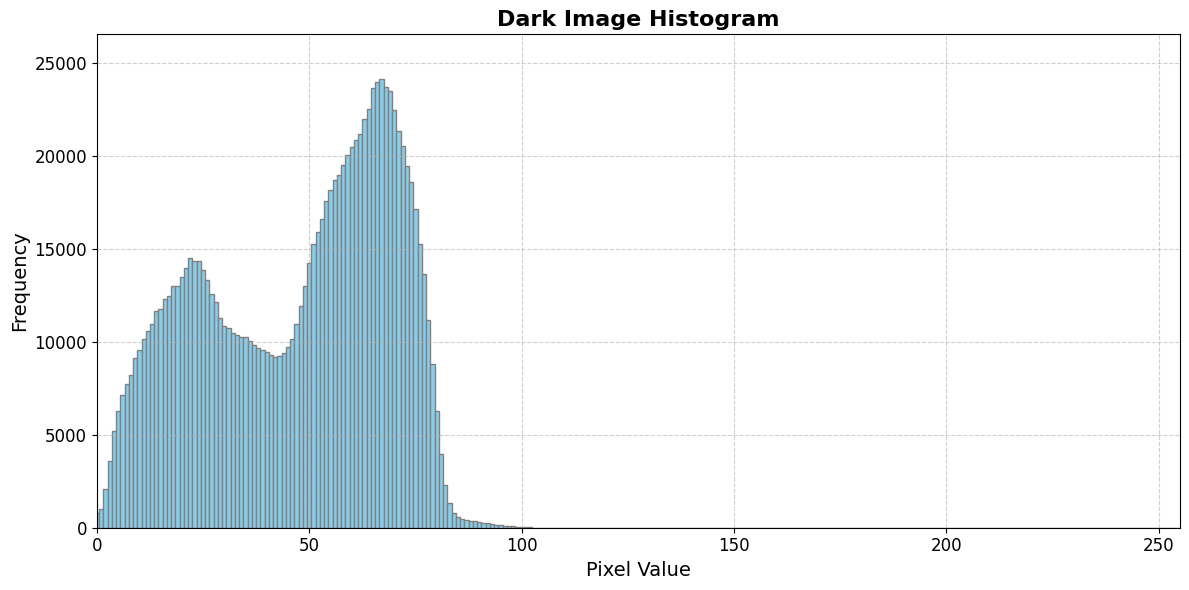

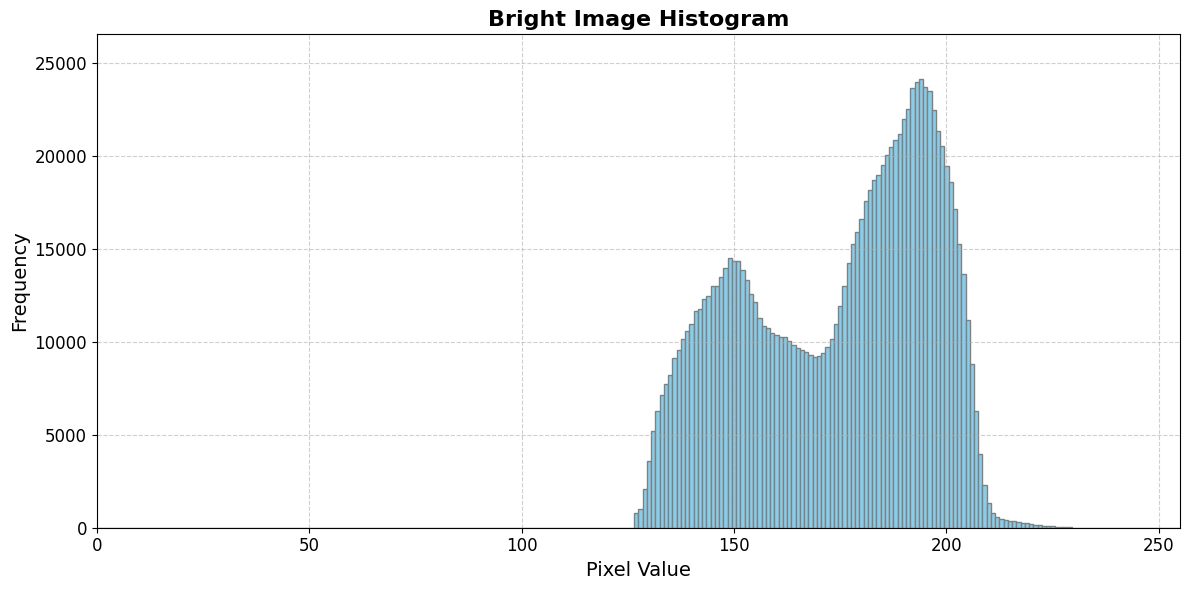

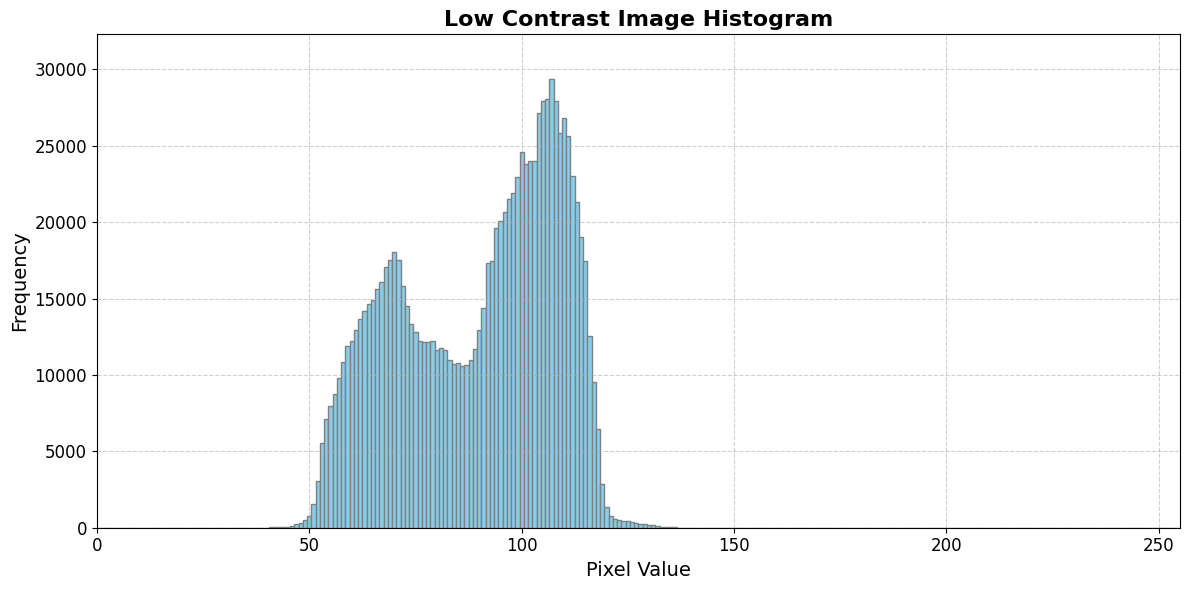

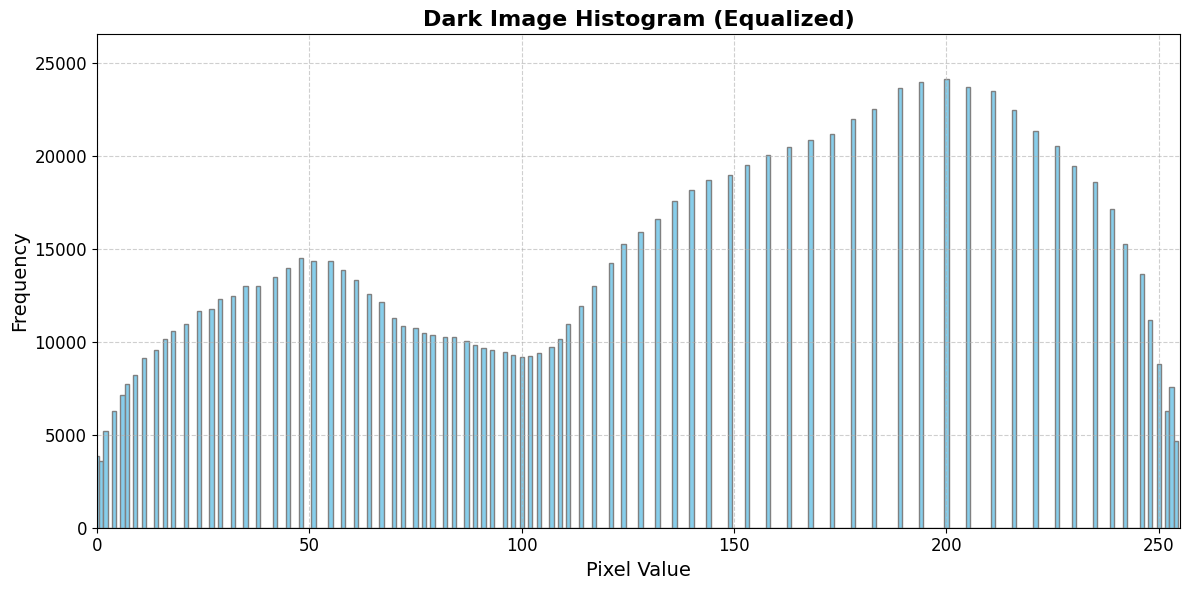

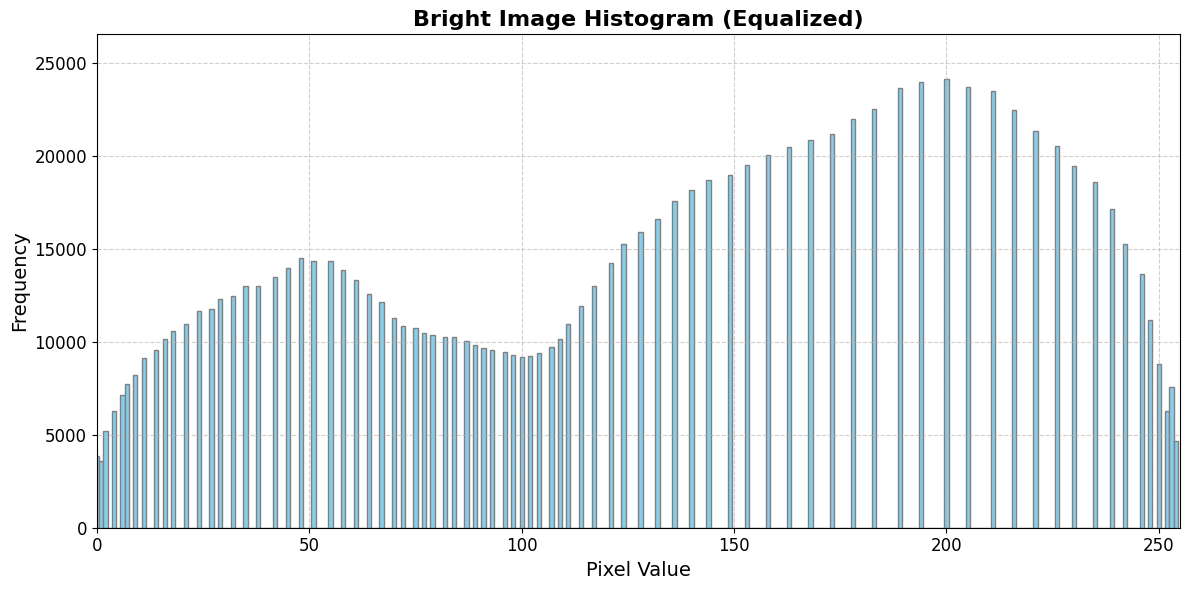

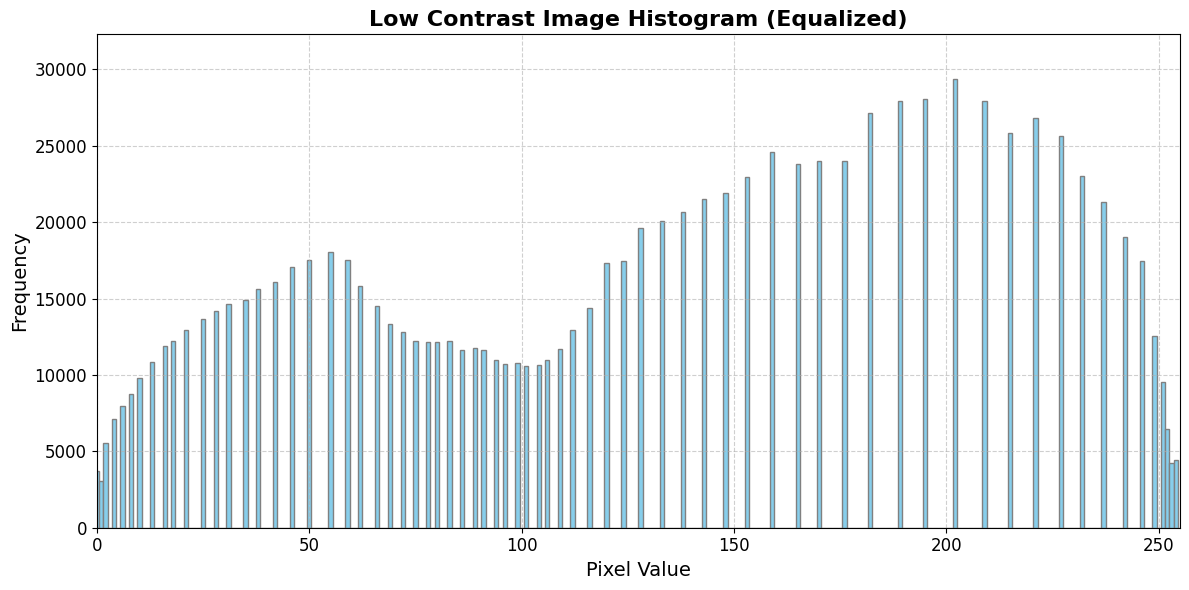

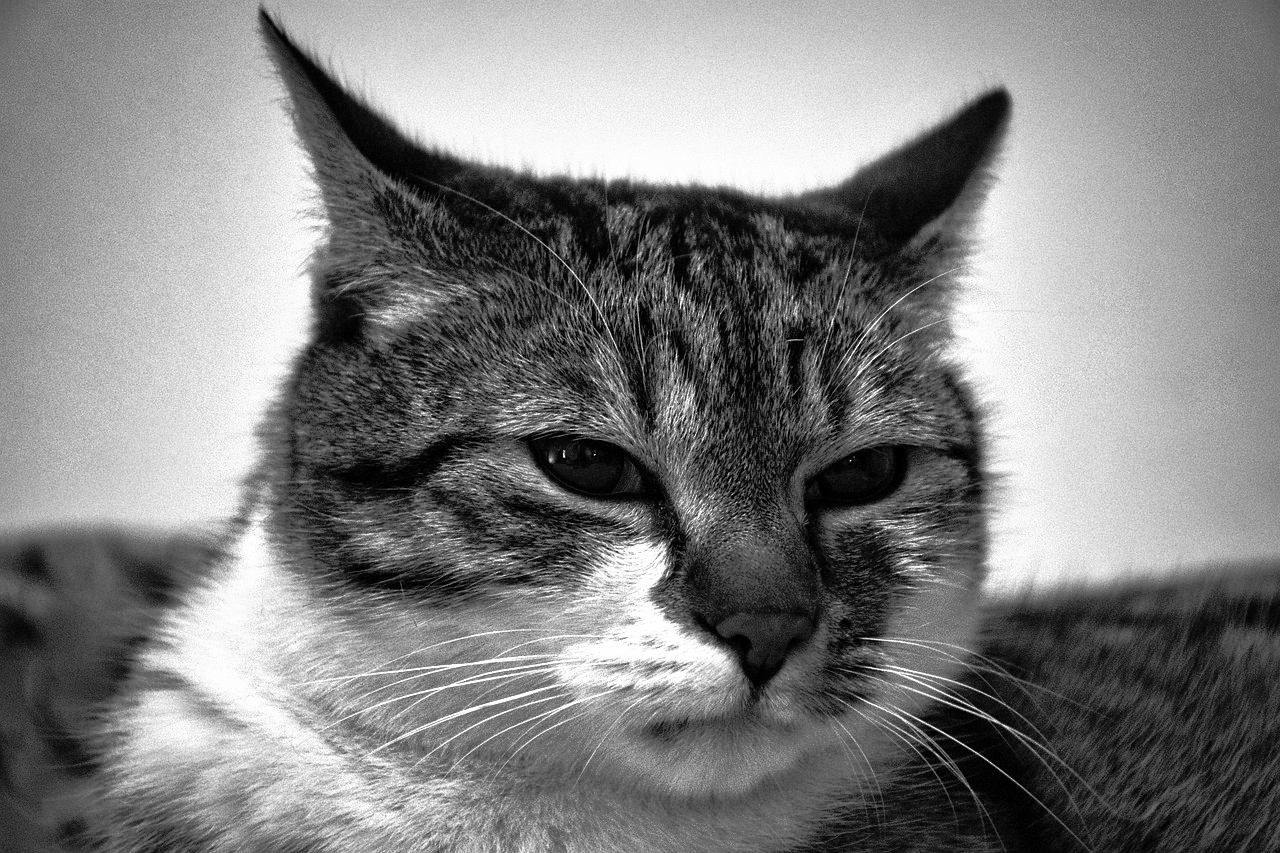

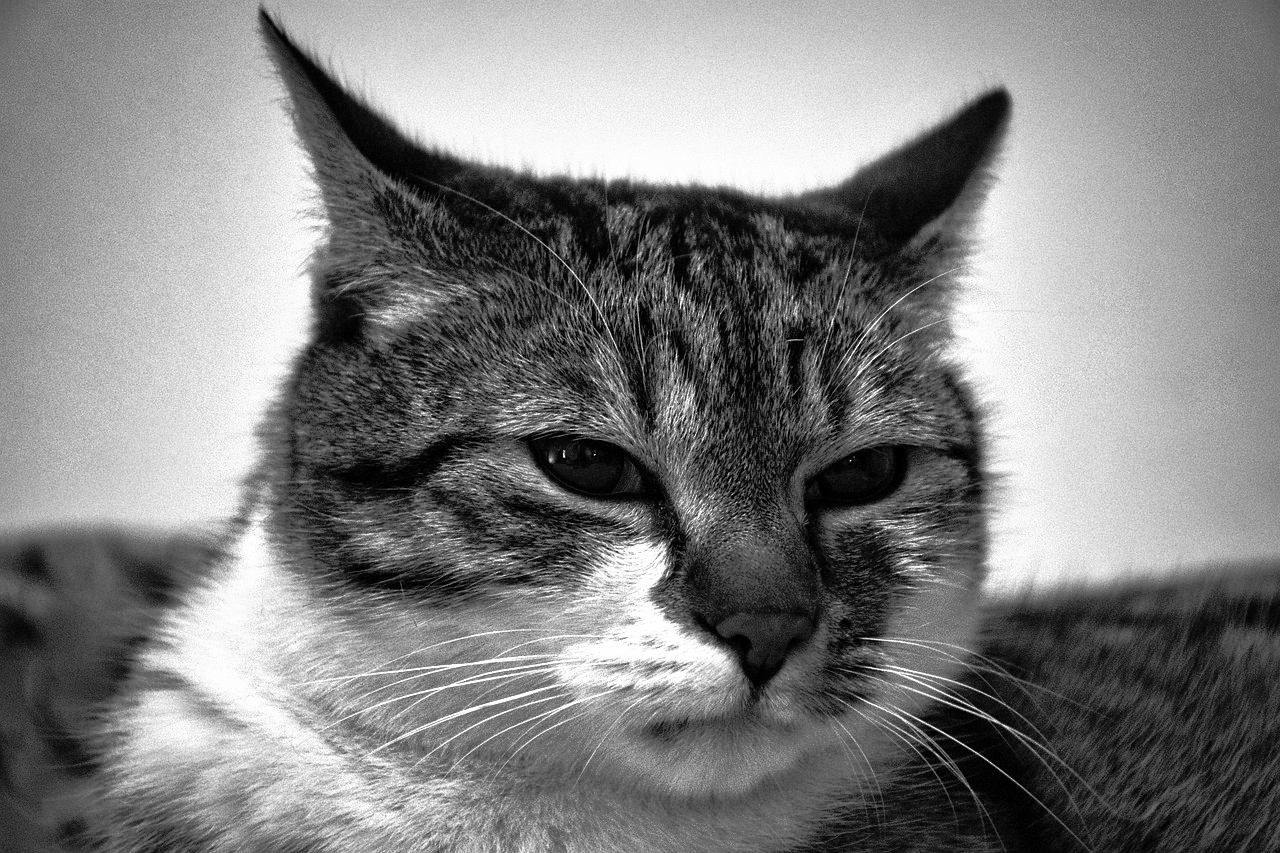

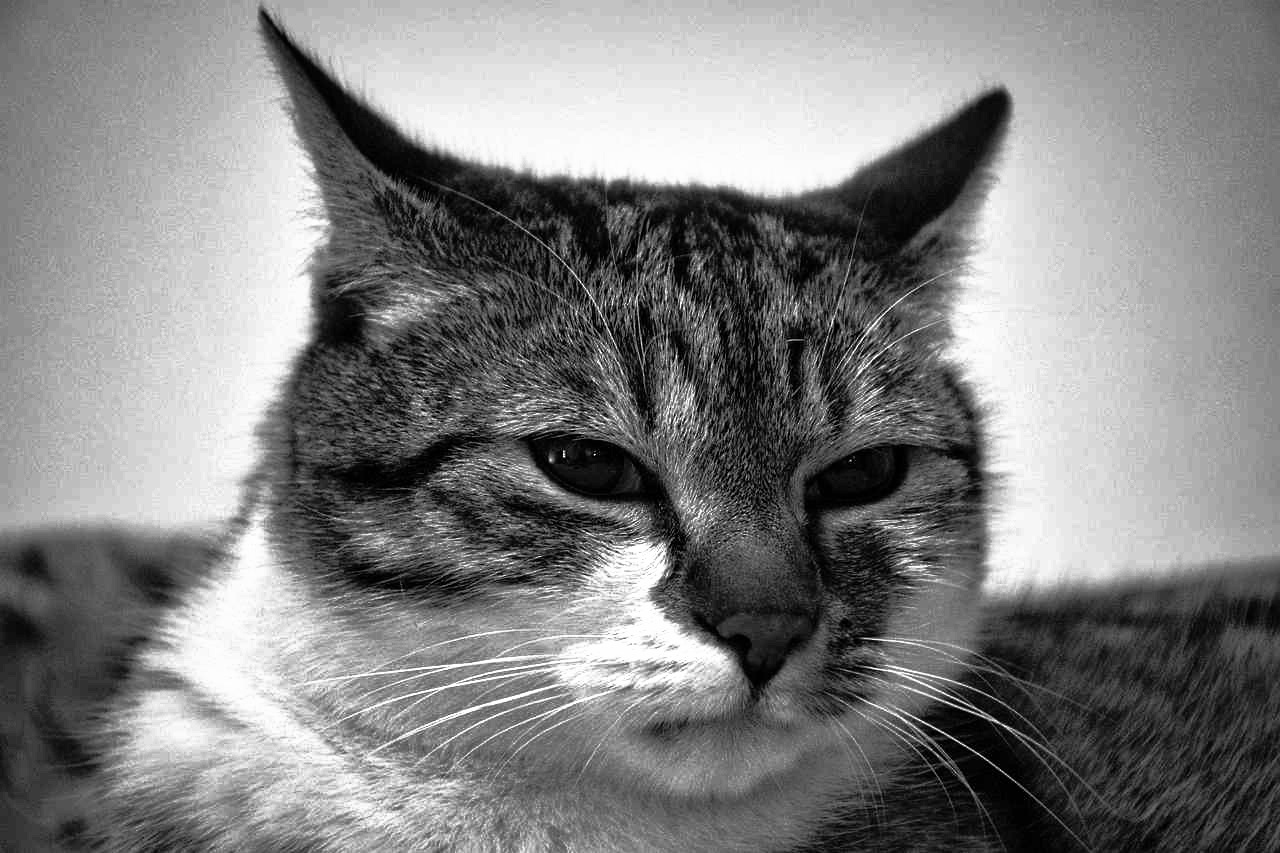

In [4]:
dark_image = Image.open('images/dark_image.png').convert('L')
bright_image = Image.open('images/bright_image.png').convert('L')
low_contrast_image = Image.open('images/low_contrast.jpg').convert('L')

calc_histogram(dark_image, 'Dark Image Histogram')
calc_histogram(bright_image, 'Bright Image Histogram')
calc_histogram(low_contrast_image, 'Low Contrast Image Histogram')

dark_image_eq = histogram_equalization(dark_image)
bright_image_eq = histogram_equalization(bright_image)
low_contrast_image_eq = histogram_equalization(low_contrast_image)

calc_histogram(dark_image_eq, 'Dark Image Histogram (Equalized)')
calc_histogram(bright_image_eq, 'Bright Image Histogram (Equalized)')
calc_histogram(low_contrast_image_eq, 'Low Contrast Image Histogram (Equalized)')

display(dark_image_eq)
display(bright_image_eq)
display(low_contrast_image_eq)


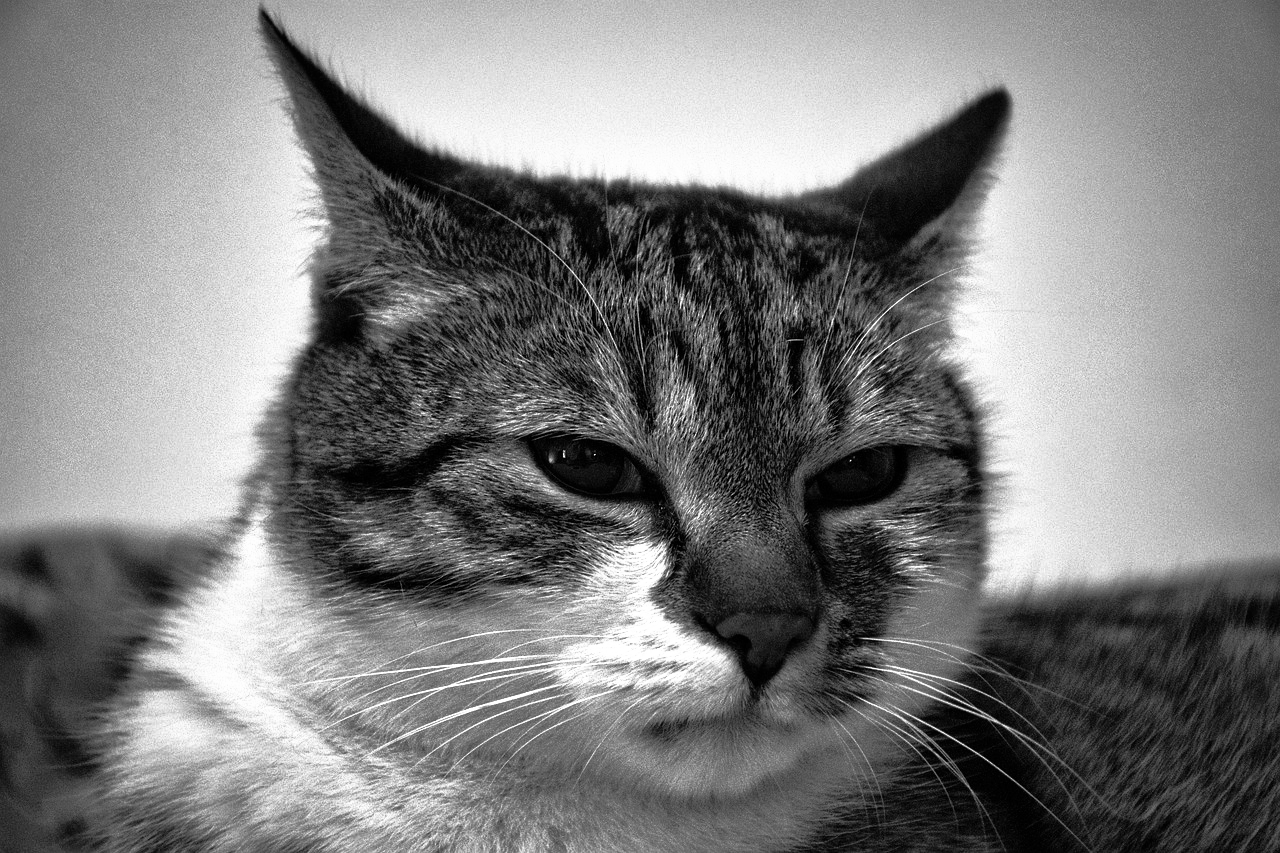

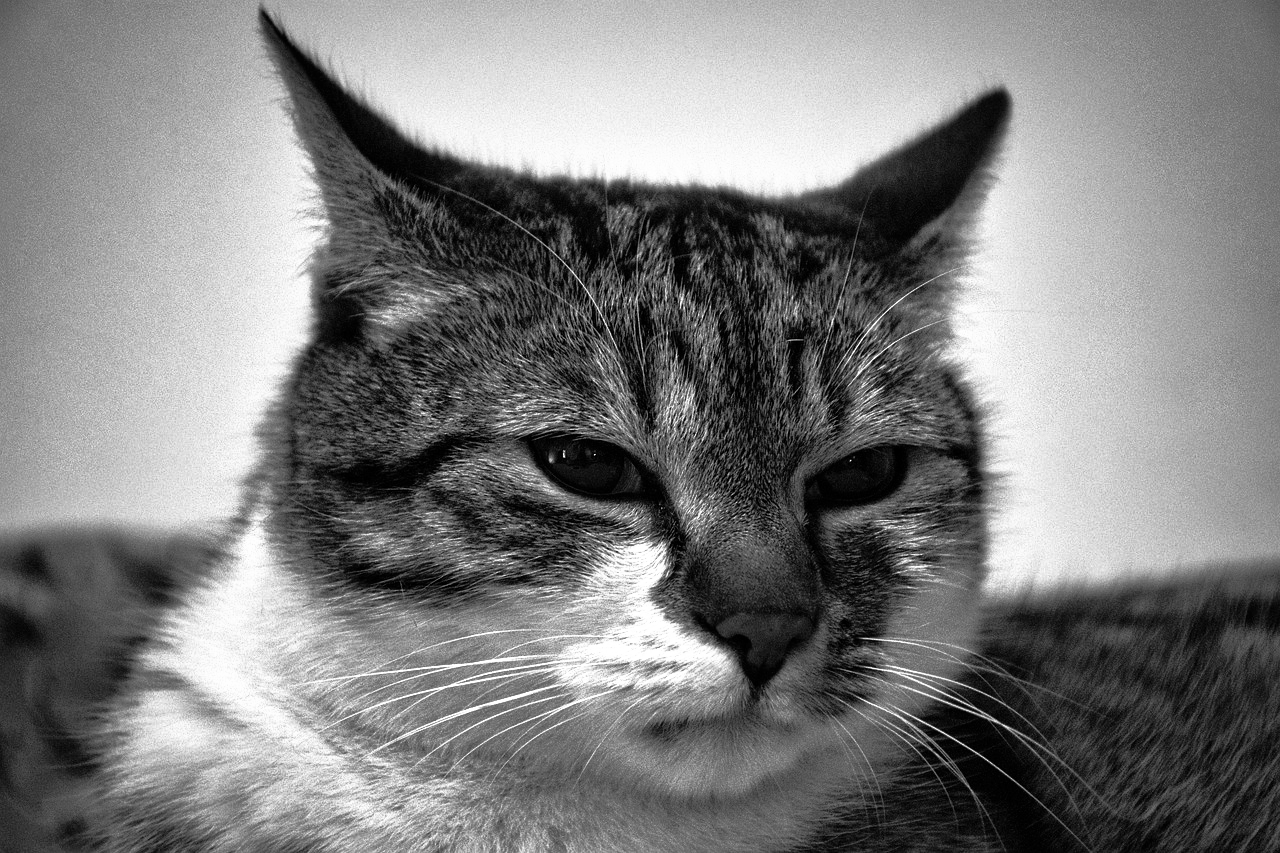

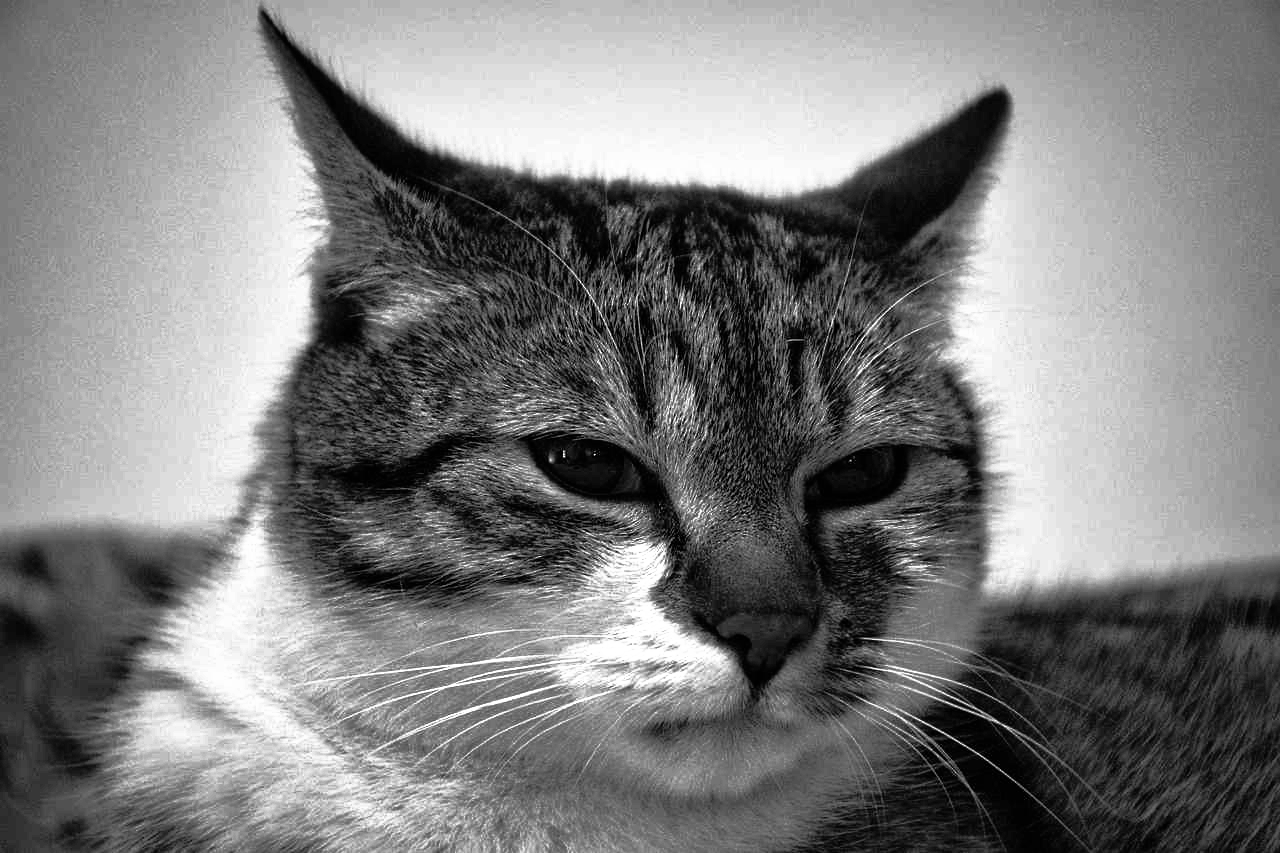

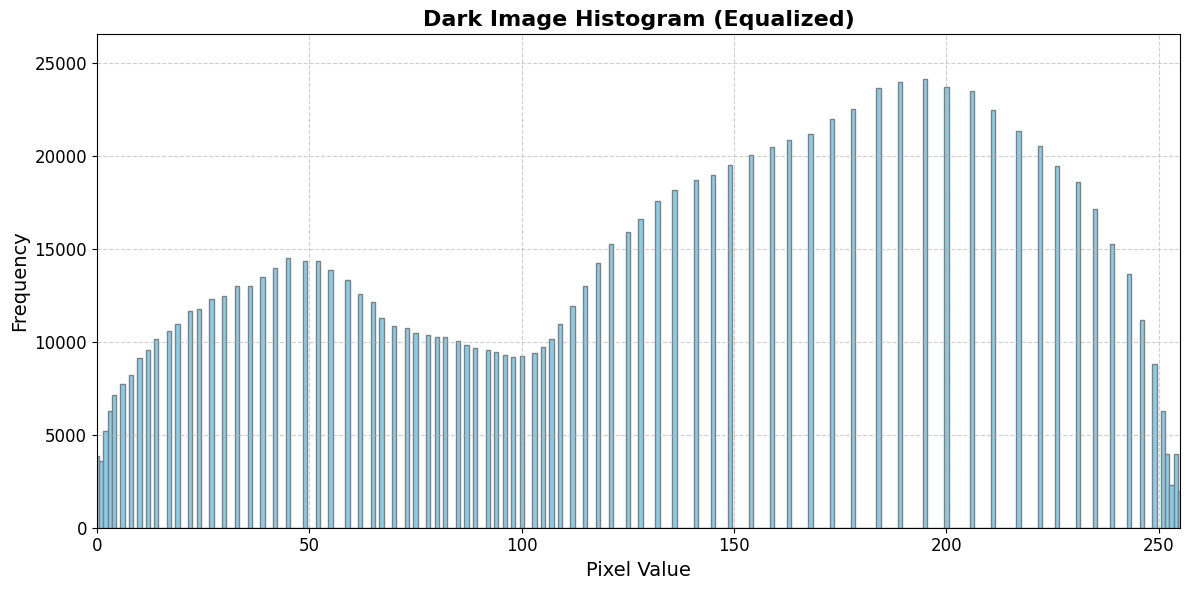

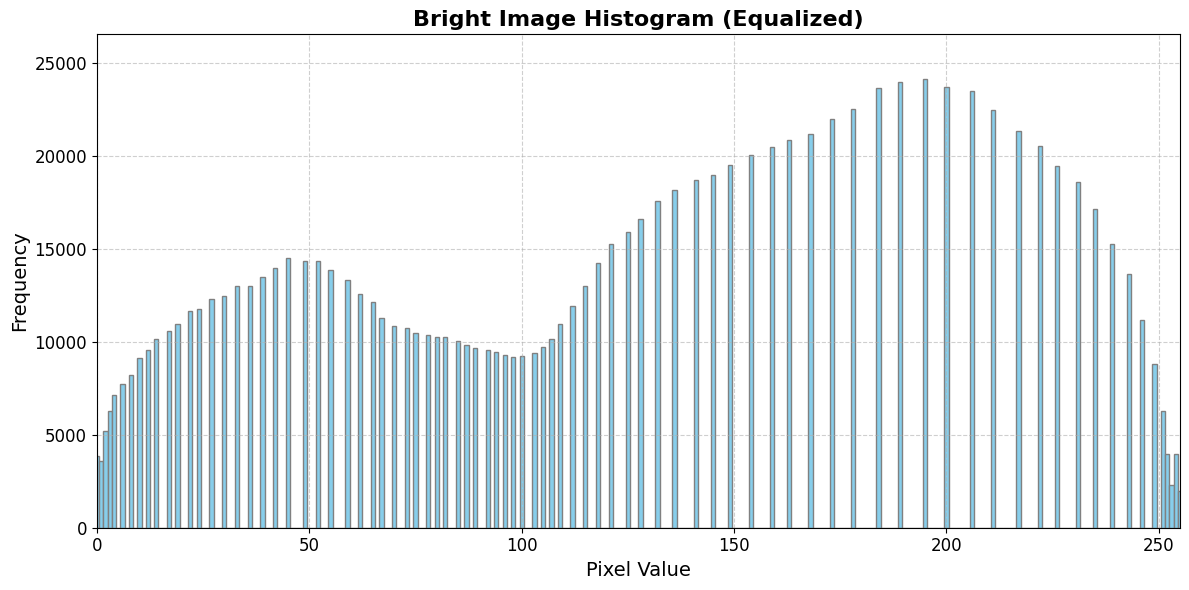

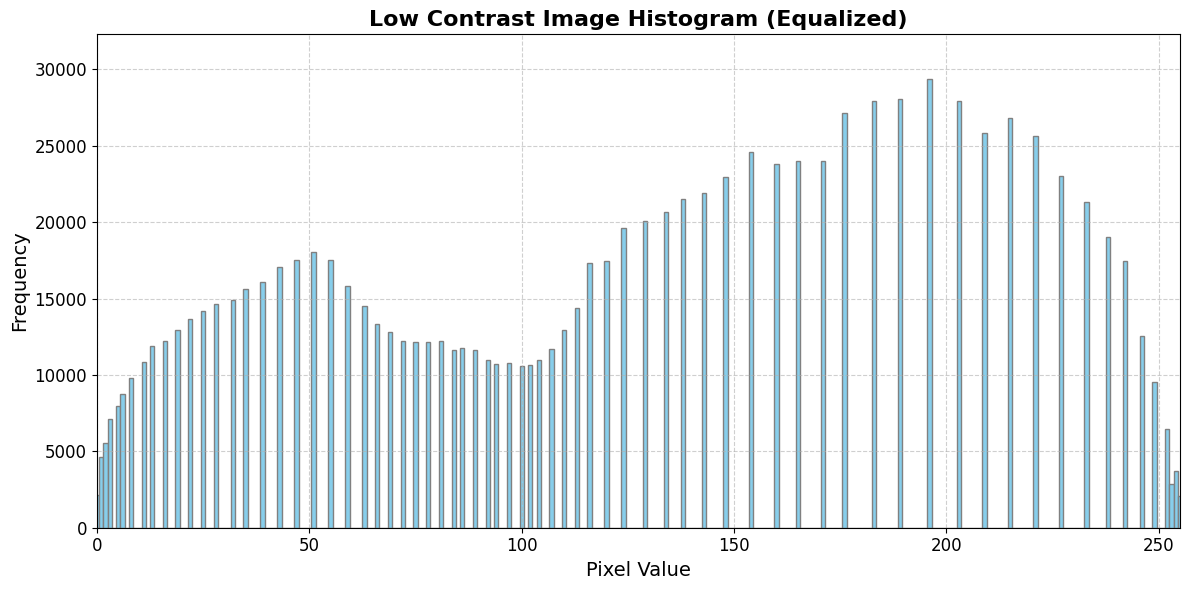

In [5]:
# histogram equalization from PIL
from PIL import ImageOps

dark_image_eq_pil = ImageOps.equalize(dark_image)
bright_image_eq_pil = ImageOps.equalize(bright_image)
low_contrast_image_eq_pil = ImageOps.equalize(low_contrast_image)

display(dark_image_eq_pil)
display(bright_image_eq_pil)
display(low_contrast_image_eq_pil)

calc_histogram(dark_image_eq_pil, 'Dark Image Histogram (Equalized)')
calc_histogram(bright_image_eq_pil, 'Bright Image Histogram (Equalized)')
calc_histogram(low_contrast_image_eq_pil, 'Low Contrast Image Histogram (Equalized)')